This is the first half of the module 3 assignment. The full module 3 assignment will be due on Wednesday, February 23 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas. 

0. List the names of your group members, as well as any other class members you conferred with for this assignment.

Noah Schapera, Minxuan Liu, Cindy Fang, Isabell Walgren 

1. In class, we derived expressions three for numerical approximations of derivatives: forward, backward, and central difference, and we wrote a function containing a for loop for each.  Write a new, more efficient function that takes in $x$ and $y$ values and outputs the derivative, $dy/dx$, along with the corresponding $x$ points, but uses only array indexing and does not contain any for loops for each of the following. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


(a) Forward difference

In [3]:
def for_diff(x,y):
  
  yi=y[0:len(y)-1]
  yip1=y[1:len(y)]

  xi=x[0:len(x)-1]
  xip1=x[1:len(x)]

  dy=np.subtract(yip1,yi)
  dx=np.subtract(xip1,xi)
  return dy/dx

(b) Backward difference

In [4]:
def back_diff(x,y):
  
  yi=y[1:len(y)]
  yim1=y[0:len(y)-1]

  
  xi=x[1:len(x)]
  xim1=x[0:len(x)-1]

  dy=np.subtract(yi,yim1)
  dx=np.subtract(xi,xim1)
  return dy/dx 

(c) Central difference

In [5]:
def cen_diff(x,y):
  
  y1=y[0:len(y)-2]
  y2=y[2:len(y)]

  x1=x[0:len(x)-2]
  x2=x[2:len(x)]  

  dy=np.subtract(y2,y1)
  dx=np.subtract(x2,x1)
  return dy/dx 

2. Evaluate the function $y = 10 e^{-x^2 \over 2\pi} \sin(2 \pi x)$ for evenly spaced $x$ values in the range $[-2\pi,2\pi]$ with spacing $h = 0.001$. Test your new functions in question 2 by calculating the numerical derivative of $y$ using each method. Create plots for each method and to compare the output of your new functions with those from class. Be sure to add a legend and label the axes of your plots for full credit. (Note: you can access the exponental function using np.exp)

At such a small step size, the three methods are approximately equal to each other. However, if we zoom into a small portion of this function we can observe some deviations. 

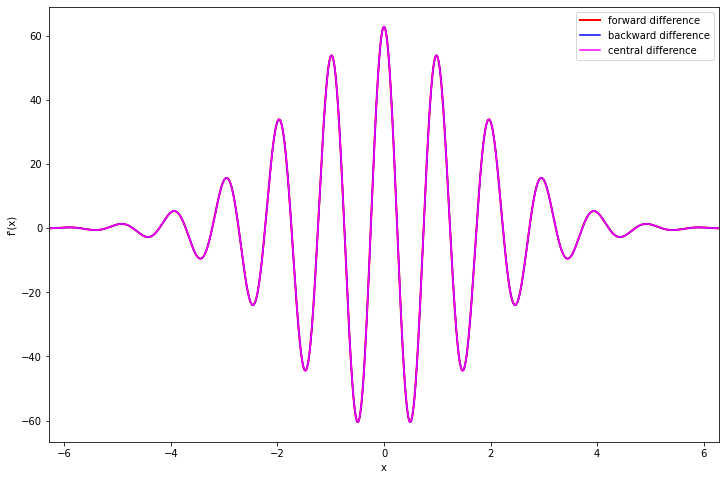

In [6]:

x=np.arange(-2*np.pi,2*np.pi,0.001)
y=10*np.exp((-x**2)/(2*np.pi))*np.sin(2*np.pi*x)


fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,8)

xForward=x[0:len(x)-1]
dyForward=for_diff(x,y)

xBackward=x[1:len(x)]
dyBackward=back_diff(x,y)

xCentral=x[1:len(x)-1]
dyCentral=cen_diff(x,y)

#ax.plot(x,y,color='gray',label='function')
ax.plot(xForward,dyForward,linewidth=2,color='red',label='forward difference')
ax.plot(xBackward,dyBackward,color='blue',label='backward difference')
ax.plot(xCentral,dyCentral,color='magenta',label='central difference')

ax.set(xlabel='x',ylabel="f'(x)",xlim=[-2*np.pi,2*np.pi])

plt.legend()
plt.show()

3. (a) Write a function that adds random noise (centered around 0) to a data set. Inputs for your function should include a data set, $y$, and and a prefactor that specifies the overall magnitude of the  random noise. Your function should output a noisy $y$ vector.

In [16]:
from numpy import random as r
def randadd(y1,pref):
  y2=np.zeros(len(y1))
  for i in range(len(y)):
    y2[i]=y1[i]+pref*(r.rand()-0.5)
  return y2

(b) Add noise to the function in question 3. Use prefactors = 0.01, 0.1, and 1. Make plots (with axes labeled and a legend) comparing the original data to these three noise values. How do the curves compare? (Note: the order of the curves in the plot matches the order you add them to the axes, so adding data from largest to smallest prefactor will make everything more visible)

The new noisy data is randomly scattered around the value of the function at each point. Changing the prefactor decreases the magnitude of this scattering. However, the overall trend in each of these dataset still matches that of the original function. 


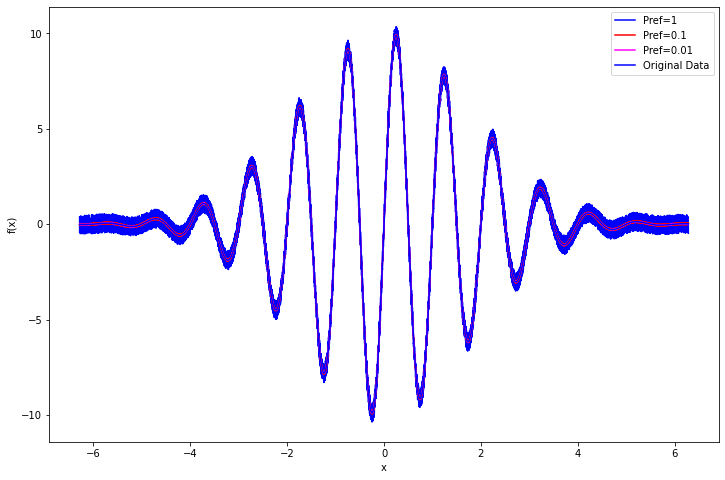

In [15]:
noiseY001=randadd(y,0.01)
noiseY01=randadd(y,0.1)
noiseY1=randadd(y,1)

fig,noiseplt = plt.subplots(1,1)
fig.set_size_inches(12,8)

noiseplt.plot(x,noiseY1,color='blue',label='Pref=1')
noiseplt.plot(x,noiseY01,color='red',label='Pref=0.1')
noiseplt.plot(x,noiseY001,color='magenta',label='Pref=0.01')
noiseplt.plot(x,y,color='blue',label='Original Data')

noiseplt.set(xlabel='x',ylabel="f(x)",xlim=[4,6],ylim=[-1.2,1.2])
plt.legend()
plt.show()

#xlim=[4,6],ylim=[-1.2,1.2]


(c) Using your central difference code, calculate the numerical derivative for each level of noise. Make plots (axes labeled and a legend) that compare the derivatives as a function of the noise level. How does the approximated derivative change as the noise is increased and why? 

As the noise level is increased, the error in our derivative appears to become exponentially worse. This is because an increased noise leads to an increased potential difference in random slope error. For example, given a noise prefactor of 1, two ajacent points only 0.001 apart might have as value difference of as much as 2. This would lead to an instantaneous slope of 2000 at this point.

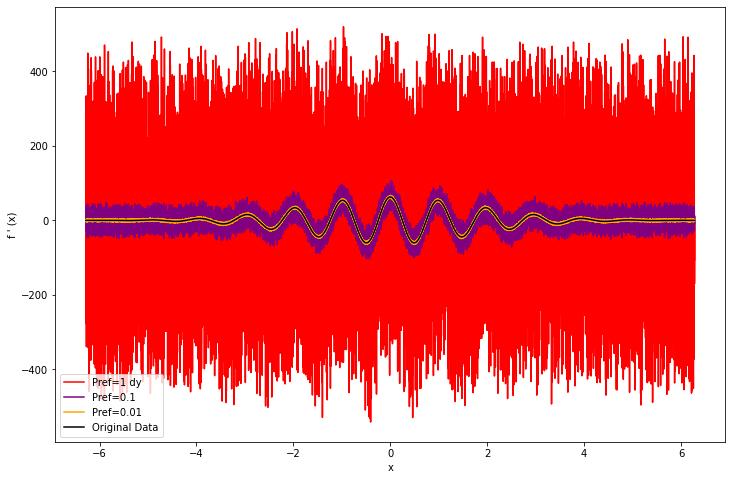

In [9]:
xCentral=x[1:len(x)-1]
dyNoise1=cen_diff(x,noiseY1)
dyNoise01=cen_diff(x,noiseY01)
dyNoise001=cen_diff(x,noiseY001)


fig,ndyplt = plt.subplots(1,1)
fig.set_size_inches(12,8)

ndyplt.plot(xCentral,dyNoise1,color='red',label='Pref=1 dy')
ndyplt.plot(xCentral,dyNoise01,color='Purple',label='Pref=0.1')
ndyplt.plot(xCentral,dyNoise001,color='orange',label='Pref=0.01')
ndyplt.plot(xCentral,dyCentral,color='black',label='Original Data')

ndyplt.set(xlabel='x',ylabel="f ' (x)")
plt.legend()
plt.show()

4. Data smoothing or filtering is a common way to reduce noise in a data set. While there are lots of ways to achieve this, one relatively simple approach is to use a moving average.  


(a) Write a function that takes in a data set, $y$ and the corresponding $x$ values, and replaces each $y$-value with $z$, the average of ```window_size``` nearby points on each side of the specified $y$ value.  For example, ```z[6] = (y[5]+y[6]+y[7])/3``` would replace ```y[6]``` and ```z[7] = (y[6]+y[7]+y[8])/3``` would replace ```y[7]``` for ```window_size = 1```. Your function should also take in ```window_size```, which specifies the number of points (on either side of the specified point) over which to average, and it should return the new $z$ values along with the corresponding $x$ values. 

In [10]:
def smooth(y, x, window_size):
  yEnd=len(y)-window_size
  v=0
  z=np.zeros(len(y[window_size:yEnd]))
  xn=x[window_size:len(x)-window_size]
  for i in range(window_size,yEnd):
    movingAverage=0
    for ii in range(-window_size,window_size+1):
      movingAverage+=y[i+ii]
    movingAverage=movingAverage/(2*window_size+1)
    z[v]=movingAverage
    v+=1
  return xn,z

(b) Use your function to explore how the moving average affects the original (non-noisy) data set. Calculate $z$ for a ```window_size``` of $50, 100, 200, 400$. Plot the results (with axis labels and a legend) along with the original data. How does the window size affect the original data and why? 

An increased window size "damps" the original data. We are replacing each value of our data with the average of a number of points surrounding it. This leads to peaks in the data to be lowered to match their surroundings while troughs are elevated. 

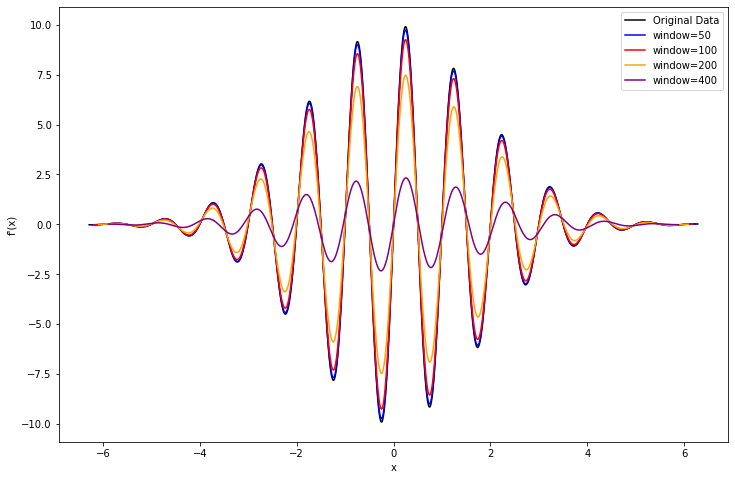

In [11]:
w50=50
w100=100
w200=200
w400=400
[x50,y50]=smooth(y,x,w50)
[x100,y100]=smooth(y,x,w100)
[x200,y200]=smooth(y,x,w200)
[x400,y400]=smooth(y,x,w400)

fig,splt = plt.subplots(1,1)
fig.set_size_inches(12,8)

splt.plot(x,y,color='black',label='Original Data')
splt.plot(x50,y50,color='blue',label='window=50')
splt.plot(x100,y100,color='red',label='window=100')
splt.plot(x200,y200,color='orange',label='window=200')
splt.plot(x400,y400,color='purple',label='window=400')

splt.set(xlabel='x',ylabel="f'(x)")
plt.legend()
plt.show()

(c) Use your function to calculate the moving average of your noisy data set with ```prefactor = 1``` for ```window_size``` values of $3, 10, 50$. Plot the results (with axis labels and a legend) along with the original data. How does the window size affect the original data and why?

While the actual trends in the clean data were damped by the smoothing function, the noisy data appears to be more robust. Instead of smoothing the extreme values of the actual function, the increased window size reduces random scattering and causes the noisy data to approach the clean data. This occurs because the noise is centered on the function's actual value and the average of a random distribution the midpoint of that distribution. 

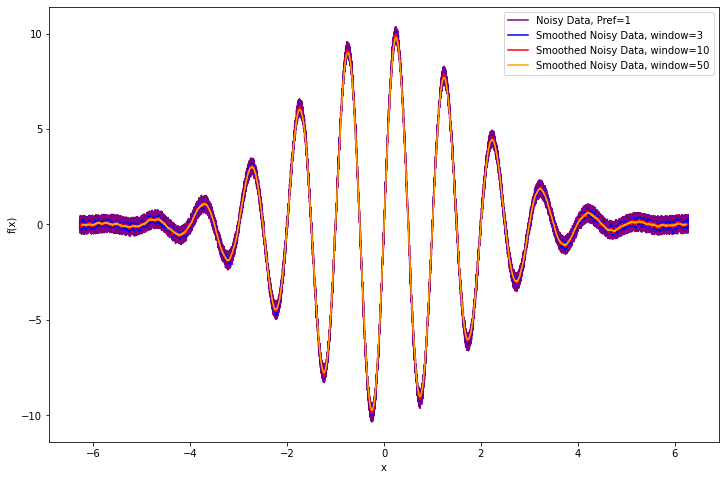

In [12]:
[smoothX3,smoothY3]=smooth(noiseY1,x,3)
[smoothX10,smoothY10]=smooth(noiseY1,x,10)
[smoothX50,smoothY50]=smooth(noiseY1,x,50)


fig,mav = plt.subplots(1,1)
fig.set_size_inches(12,8)

mav.plot(x,noiseY1,color='purple',label='Noisy Data, Pref=1')
mav.plot(smoothX3,smoothY3,color='blue',label='Smoothed Noisy Data, window=3')
mav.plot(smoothX10,smoothY10,color='red',label='Smoothed Noisy Data, window=10')
mav.plot(smoothX50,smoothY50,color='orange',label='Smoothed Noisy Data, window=50')
mav.set(xlabel='x',ylabel='f(x)')
plt.legend()
plt.show()

(d) Use your central difference function to calculate the derivatives of your moving-averaged data from (c).  Plot the results (with axis labels and a legend) along with the derivative data. How does the moving averaged derivative compare to the derivative of the noisy data? How does the moving averaged derivative compare to the derivative of the non-noisy data? How does the value of ```window_size``` affect your results?

Applying the moving average function to our data causes the randomness and extreme values in the derivative to decrease. Increasing the smoothing window causes the calculated derivative for the noisy data to approach the expected derivative of the clean data.  

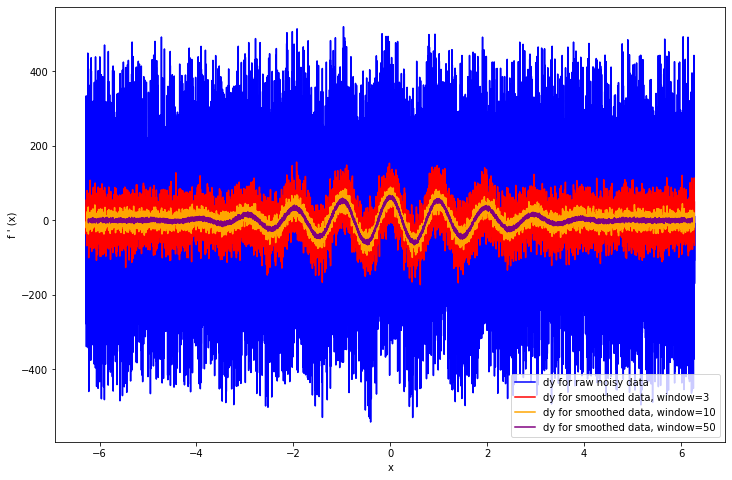

In [13]:
smoothX3Central=smoothX3[1:len(smoothX3)-1]
smoothdy3=cen_diff(smoothX3,smoothY3)

smoothX10Central=smoothX10[1:len(smoothX10)-1]
smoothdy10=cen_diff(smoothX10,smoothY10)

smoothX50Central=smoothX50[1:len(smoothX50)-1]
smoothdy50=cen_diff(smoothX50,smoothY50)


fig,ndyplt = plt.subplots(1,1)
fig.set_size_inches(12,8)


ndyplt.plot(xCentral,dyNoise1,color='Blue',label='dy for raw noisy data')
ndyplt.plot(smoothX3Central,smoothdy3,color='Red',label='dy for smoothed data, window=3')
ndyplt.plot(smoothX10Central,smoothdy10,color='orange',label='dy for smoothed data, window=10')
ndyplt.plot(smoothX50Central,smoothdy50,color='purple',label='dy for smoothed data, window=50')

ndyplt.set(xlabel='x',ylabel="f ' (x)")
plt.legend()
plt.show()

(e) What do your results from (b), (c), and (d) tell us about selecting a ```window_size```?

Selecting an approprite windowsize depends on the noise level of our data. If the data is relatively clean, we should use a small windowsize so that we don't accidentally smooth out the trends we are hoping to study. However, if our data is very noisy we can increase the windowsize a significant amount to reduce noise without disrupting the overall trends. 

(f) Now take the moving average of your noisy derivative with ```prefactor = 1``` and plot the results for the same ```window_size = 50``` along with your calculation from (d) with the same ```prefactor``` and ```window_size```. Does it matter which order you peform the moving average and derivative operations? Why or why not?

It doesn't matter in which order you smooth the data and take the derivative and applying either method first result in identical datasets. Smoothing the data first reduces the noisy function down to the clean function, allowing for a more accurate derivative calculation. Simmilarly, smoothing the derivative of the noisy dataset reduces its error. Both methods are equally effective.  

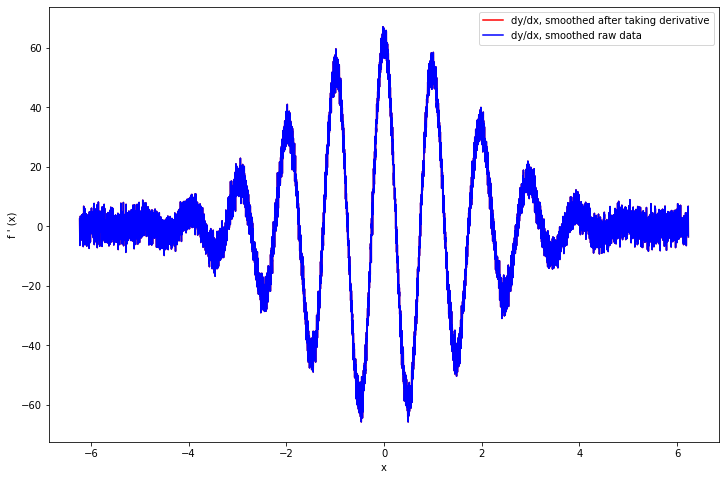

In [14]:
[smoothX_after_deriv,smoothdy_after_deriv]=smooth(dyNoise1,xCentral,50)

fig,dycomp = plt.subplots(1,1)
fig.set_size_inches(12,8)

dycomp.plot(smoothX_after_deriv,smoothdy_after_deriv,color='red',label='dy/dx, smoothed after taking derivative')
dycomp.plot(smoothX50Central,smoothdy50,color='blue',label='dy/dx, smoothed raw data')

dycomp.set(xlabel='x',ylabel="f ' (x)")
plt.legend()
plt.show()
